ФИО:____________________

№ группы:_______________

# Лабораторная работа
# Автодифференцирование

Используем библиотеку `torch`.

Задана функция двух переменных

$ u(x,t) $

Если такая функция удовлетворяет условию

$ \frac{\partial^2 u}{\partial x^2} = \frac{\partial^2 u}{\partial t^2} $,

для любых аргументов x, t то она является решением (одним из) [волнового уравнения](https://ru.wikipedia.org/wiki/Волновое_уравнение).

Некоторые функции удовлетворяют волновому уравнению всюду. Например, функция-константа $ u(x,t)=const $.

Другие функции могут удовлетворять такому уравнению в некоторых точках.

И, наконец, бывают функции которые не удовлетворяют этому уравнению вовсе.

Поиск подходящих под определенные условия решений волнового уравнения - важная задача физики.




Ваша задача для заданной функции проверить, удовлетворяет ли она уравнению и где именно.

Для этого:

а) напишите функцию по заданной формуле, которая принимает и обрабатывает массивы типа `torch.tensor`

б) создайте координатную сетку на плоскости (x,t), где аргументы x,t равномерно изменяются в пределах -10 до +10 и по каждой оси сетка имеет 201 узел. Формат - массивы `numpy`.

в) для **каждого** узла такой сетки (x,t) посчитайте, **используя автодифференцирование** `torch.autograd.grad`, вторые производные $ \frac{\partial^2 u}{\partial x^2} $ и $\frac{\partial^2 u}{\partial t^2} $  и сохраните их в отдельные массивы numpy.

г) сравните эти массивы на равенство их элементов. Нарисуйте полученный логический массив в виде картинки (изображения, команда, например, `imshow`) так, чтобы истинные значения отображались белым цветом, ложные - черным.

д) посчитайте и выведите на экран *долю* истинных элементов в массиве.

Отправьте решение преподавателю.

Варианты функций (назначаются преподавателем):
- №1 $ u(x,t)=sin(x)*sin(t) $
- №2 $ u(x,t)=sin(x)+sin(t) $
- №3 $ u(x,t)=x*sin(t) $
- №4 $ u(x,t)=tanh(x*t+x)*sin(3*t) $

In [11]:
# ВАШ КОД ЗДЕСЬ

In [12]:
# импорт
import torch
import numpy as np


In [13]:
N=201 # число точек в сетке
#N=200 # число точек в сетке
x = np.linspace(-10,10,N) # аргумент x
t = np.linspace(-10,10,N)# аргумент t

shape=(len(x),len(t)) # размеры сетки
uD2x=np.zeros(shape) # массив для хранения второй производной по x
uD2t=np.zeros(shape) # массив для хранения второй производной по t
U=np.zeros(shape) # массив для хранения значений функции u

In [14]:
# Создаем функцию
def u_fun(x,t):
  #u=torch.sin(x)*torch.sin(t) # 1
  u=torch.sin(x)+torch.sin(t) # 2
  #u=x*t
  #u=x*t.sin() # 3
  #u=torch.tanh(x*t+t)*torch.sin(x)
  return u

In [15]:
# Расчет производных
from tqdm import tqdm # для красоты циклов

for i in tqdm(range(shape[0])): # цикл по x
  for j in range(shape[1]): # цикл по t
    x_=torch.tensor(x[i],requires_grad=True) # в тензор
    t_=torch.tensor(t[j],requires_grad=True) # в тензор
    u_=u_fun(x_,t_) # расчет функции
    Dux=torch.autograd.grad(u_,x_,create_graph=True) # первая производная (по x аргументу)
    Du2x=torch.autograd.grad(Dux,x_,allow_unused=True) # вторая производная (по x аргументу)
    Dut=torch.autograd.grad(u_,t_,create_graph=True) # первая производная (по t аргументу)
    Du2t=torch.autograd.grad(Dut,t_,allow_unused=True) # вторая производная (по t аргументу)
    uD2x[i][j]=Du2x[0] if Du2x[0] is not None else 0  # сохраняем для x
    uD2t[i][j]=Du2t[0] if Du2t[0] is not None else 0  # сохраняем для t
    U[i][j]=u_ # сохраняем для u


100%|██████████| 201/201 [00:07<00:00, 28.15it/s]


In [16]:
#if_equal= uD2t==uD2x # сравниваем массивы
if_equal= abs(uD2t-uD2x)<1e-8
correct=if_equal.sum()/np.prod(shape) # доля совпадающих
print('Совпадает на ',correct)

Совпадает на  1.0


In [17]:
#uD2t[0,:]

In [18]:
# Рисование
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
X, T = np.meshgrid(x, t) # расчетная сетка


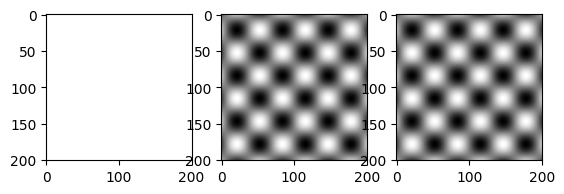

In [19]:
fig = plt.figure() # полотно
ax1 = fig.add_subplot(131) # ось
surf = ax1.imshow(if_equal,vmin=0,vmax=1,cmap='gray') # изображение матрицы
ax2 = fig.add_subplot(132) # ось
surf = ax2.imshow(uD2x,cmap='gray') # изображение матрицы
ax3 = fig.add_subplot(133) # ось
surf = ax3.imshow(uD2t,cmap='gray') # изображение матрицы

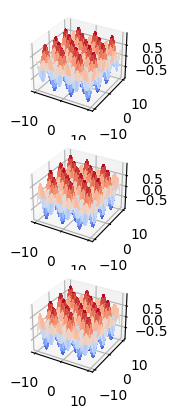

In [20]:
# дополнительное рисование
fig = plt.figure()
ax1 = fig.add_subplot(311, projection='3d') # 3D оси рисования
surf = ax1.plot_surface(X, T, U, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False) # поверхность
ax2 = fig.add_subplot(312, projection='3d')
surf = ax2.plot_surface(X, T, uD2x, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3 = fig.add_subplot(313, projection='3d')
surf = ax3.plot_surface(X, T, uD2t, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
